<div style="border:solid Chocolate 2px; padding: 40px">

<b> Александр, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Могу я попросить закрывать за собой незакрытые теги \<div>?
Для юпитера это не актуально, но при попытке просмотреть в браузере съезжает верстка. Вот во что превращаются подобные блокноты:
![f](https://gifara.ru/ds/3a01/pic3.png)
Несколько печально потом править всё.
</div>


<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Да, без проблем, в актуальных комментариях будет закрыто.
    
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

## Подготовка данных

In [1]:
!pip install -U sklearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
#import lightgbm
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV #, StratifiedKFold, KFold,
from IPython.display import display, Markdown, HTML
from sklearn.metrics import mean_squared_error as MSE, make_scorer


In [3]:
RS = 1
VERBOSE = 3
CV = 3

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

In [4]:
data=pd.read_csv("/datasets/autos.csv", parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Данные загрузили. Круто, что сразу парсишь дату:)
    
При считывании данных из файла здорово перестраховывать себя от ошибок, связанных, например, с неверным указанием пути к файлу. А иногда бывает, что работаешь с файлом локально, выгружаешь его на сервер, ожидая, что он будет принимать данные, которые лежат на том же сервере, а код падает с ошибкой, потому что путь к файлу не поменялся с локального на серверный.
    
Для этого, например, можно использовать конструкцию `try-except`: сначала пробуешь локальный путь, при возникновении ошибки используется серверный путь (подробнее можешь почитать тут: https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html).
    
Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


In [6]:
data = data.fillna('is_na')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Отличное решение по обработке пропусков: замена на заглушку - лучший вариант, чтобы сохранить данные для обучения и не вносить в модель новые ошибки.

In [7]:
#v2
data.duplicated().sum()

4

In [8]:
data = data.drop_duplicates().reset_index(drop=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалили дубликаты - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Перед удалением стоит явно оценивать их наличие - иначе мы можем ввести заказчика в заблуждение, удаляя дубликаты, которых на самом деле нет - он может подумать, что в данных есть проблемы.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Восстановил. В CR версии было удалено.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [9]:
print(f'пропусков: {data.isna().sum().sum()}\n')
data.info()
data.describe(datetime_is_numeric=True)

пропусков: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354365 entries, 0 to 354364
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354365 non-null  datetime64[ns]
 1   Price              354365 non-null  int64         
 2   VehicleType        354365 non-null  object        
 3   RegistrationYear   354365 non-null  int64         
 4   Gearbox            354365 non-null  object        
 5   Power              354365 non-null  int64         
 6   Model              354365 non-null  object        
 7   Kilometer          354365 non-null  int64         
 8   RegistrationMonth  354365 non-null  int64         
 9   FuelType           354365 non-null  object        
 10  Brand              354365 non-null  object        
 11  Repaired           354365 non-null  object        
 12  DateCreated        354365 non-null  datetime64[ns]
 13  NumberOfPictures   354365 non-

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,NumberOfPictures,PostalCode,LastSeen
count,354365,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365,354365.0,354365.000000,354365
mean,2016-03-21 12:58:09.520460544,4416.679830,2004.234481,110.093816,128211.363989,5.714650,2016-03-20 19:12:06.583042560,0.0,50508.503800,2016-03-29 23:51:06.766184960
min,2016-03-05 14:06:22,0.000000,1000.000000,0.000000,5000.000000,0.000000,2014-03-10 00:00:00,0.0,1067.000000,2016-03-05 14:15:08
25%,2016-03-13 11:52:33,1050.000000,1999.000000,69.000000,125000.000000,3.000000,2016-03-13 00:00:00,0.0,30165.000000,2016-03-23 02:50:03
50%,2016-03-21 17:50:55,2700.000000,2003.000000,105.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,49413.000000,2016-04-03 15:15:52
75%,2016-03-29 14:37:20,6400.000000,2008.000000,143.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,71083.000000,2016-04-06 10:15:19
max,2016-04-07 14:36:58,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,2016-04-07 14:58:51
std,NaN,4514.176349,90.228466,189.851330,37905.083858,3.726432,NaN,0.0,25783.100078,NaN


In [10]:
#NumberOfPictures
for i in data.columns[data.nunique() == 1]:
    print(f"Полностью бесполезный столбец '{i}' удаляется")
    data = data.drop(i, axis=1)
data

Полностью бесполезный столбец 'NumberOfPictures' удаляется


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,is_na,1993,manual,0,golf,150000,0,petrol,volkswagen,is_na,2016-03-24,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,is_na,125000,5,gasoline,audi,yes,2016-03-24,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,is_na,2016-03-14,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354360,2016-03-21 09:50:58,0,is_na,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,2694,2016-03-21 10:42:49
354361,2016-03-14 17:48:27,2200,is_na,2005,is_na,0,is_na,20000,1,is_na,sonstige_autos,is_na,2016-03-14,39576,2016-04-06 00:46:52
354362,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,26135,2016-03-11 18:17:12
354363,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,87439,2016-04-07 07:15:26


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Согласен, признак лишний, можно удалять.

In [11]:
#data.hist(figsize=(20,10), bins=100); #v1

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

При работе с графиками важно соблюдать следующие правила:
1. Стоит подписать названия осей X и Y.
2. Также стоит дать название графику.
3. Технические комментарии типа `<AxesSubplot:xlabel='datetime'>` стоит убирать - это можно сделать, поставив точку с запятой в последней строке кода в блоке визуализации, либо сделать последней строкой кода этого блока метод `plt.show()`.
4. Графики нужно сделать больше - графики дефолтного размера не очень удобны для чтения. Удобнее будет настроить параметр `plt.rcParams["figure.figsize"] = (x,y)` сразу в ячейке импорта библиотек, и все графики проекта будут одного размера.
        
Несколько таких нехитрых приёмов очень повысят ценность твоей визуализации:)
        
Убедись, пожалуйста, что графики в твоём проекте соответствуют этим правилам.

    
Отмечу, что метод `hist` не поддаётся кастомизации, поэтому каждый график нужно рисовать отдельно, но процесс можно автоматизировать с помощью цикла.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Принято. Поправлю.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Просто на всякий случай: тут вы явным образом противоречили тому, что давалось в теории. Там есть прям отдельный урок, в котором рекомендуется для первичного знакомства с данными использовать hist для всего датафрейма целиком. Со стороны выглядит как незнание матчасти (хоть это и не так).
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Для себя ты можешь пользоваться `hist` для формирования первичных выводов, да. Тут ты готовишь чистовой проект для заказчика, в нём графики должны быть оформлены корректно - об этом есть отдельное упоминание в полезных материалах в части рекомендаций по оформлению проектов, а также в уроках курса по визуализации, которые были в начале обучения.
    
</div>

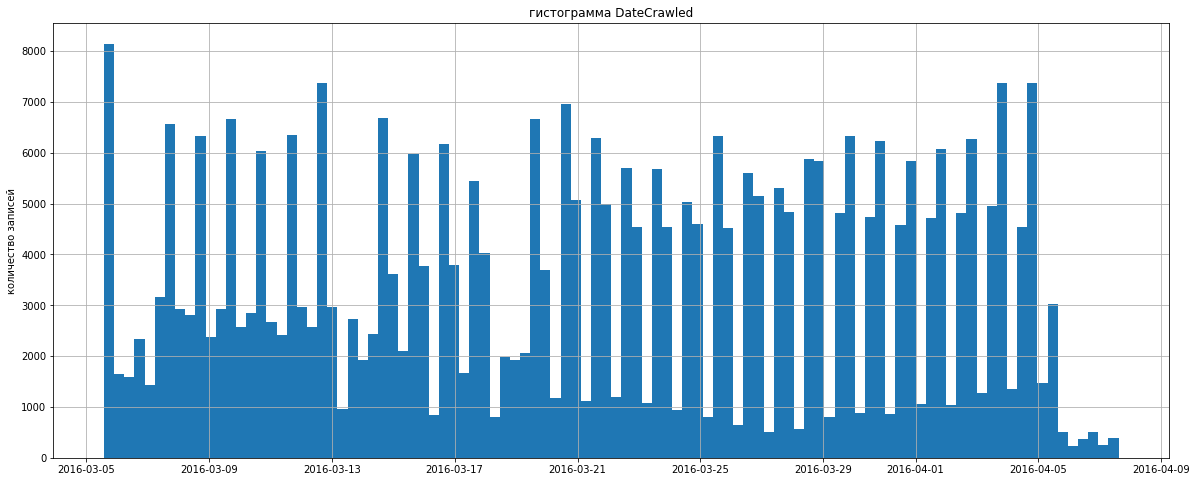

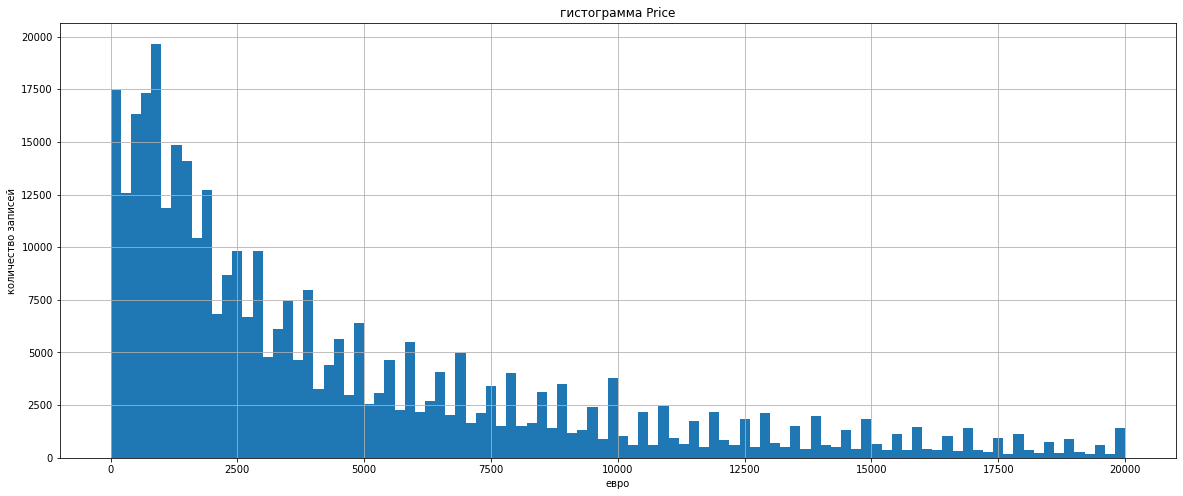

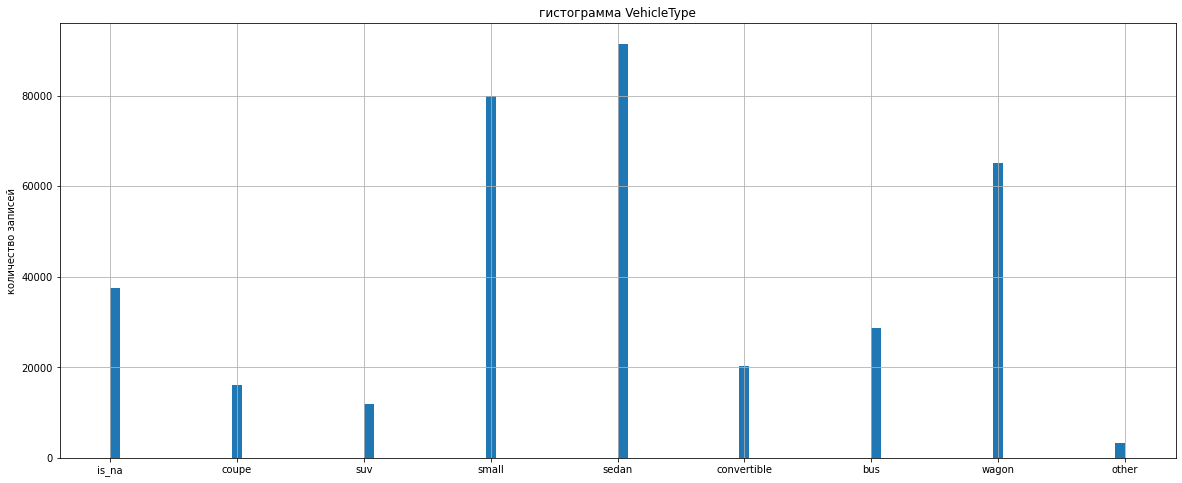

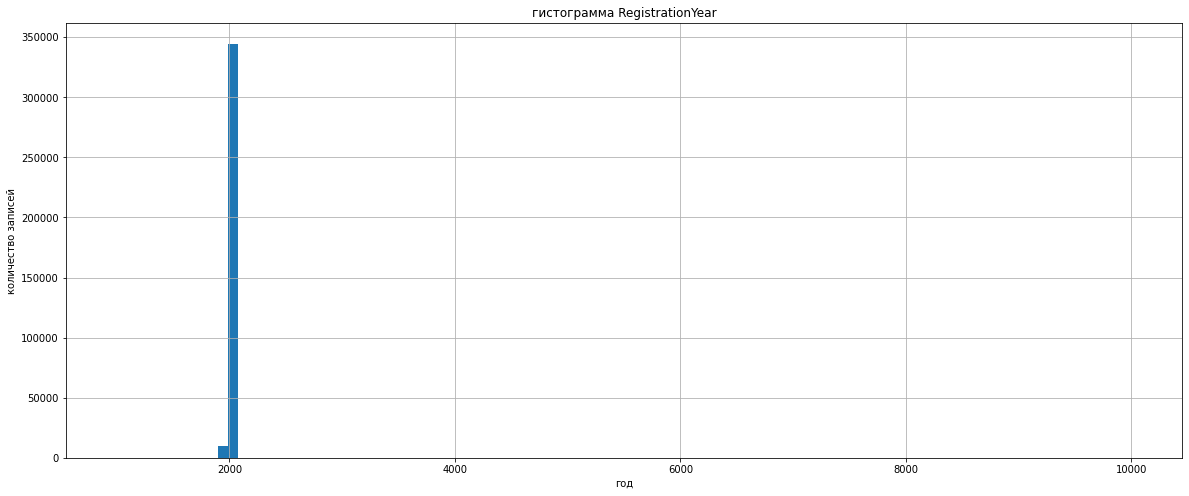

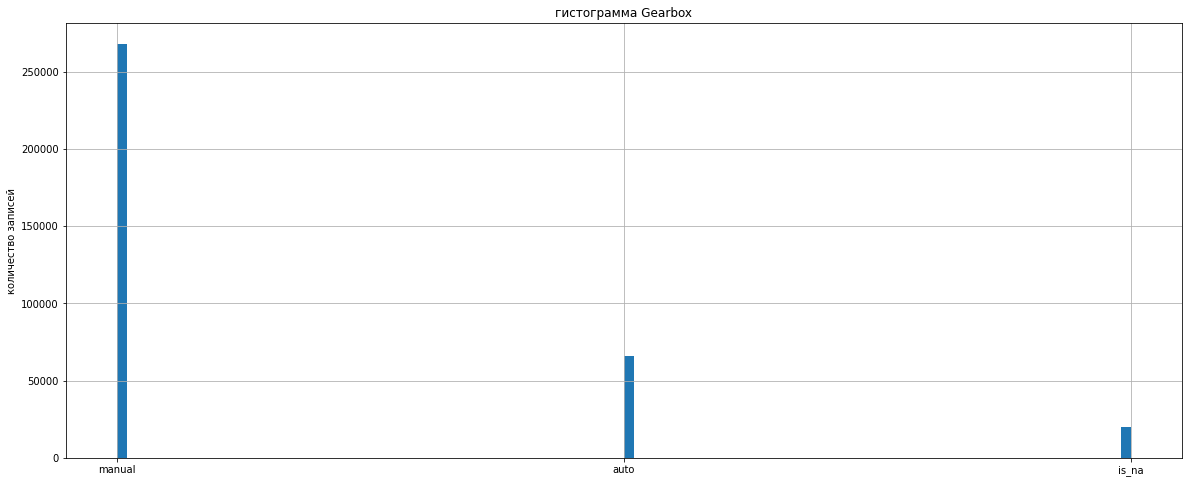

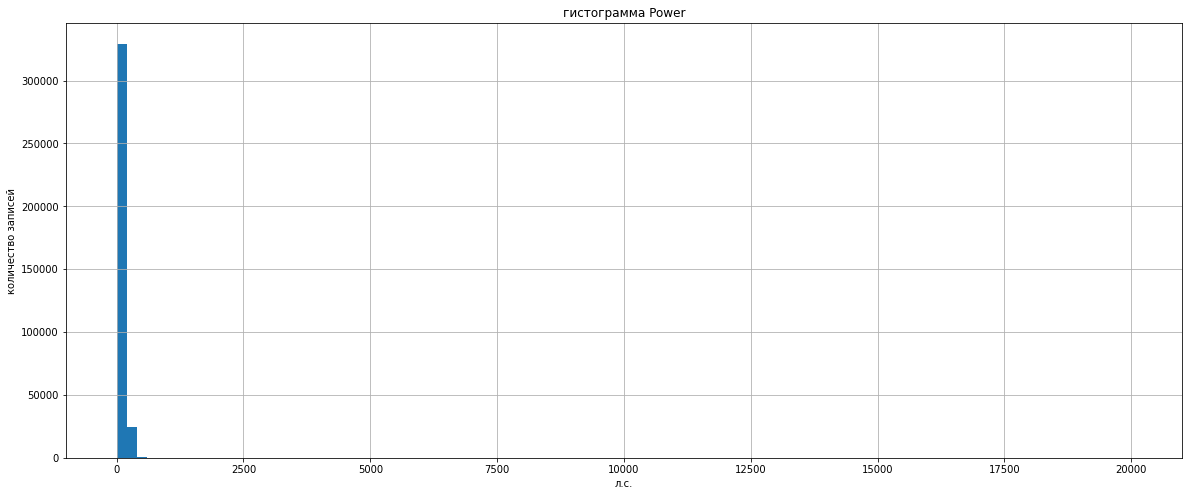

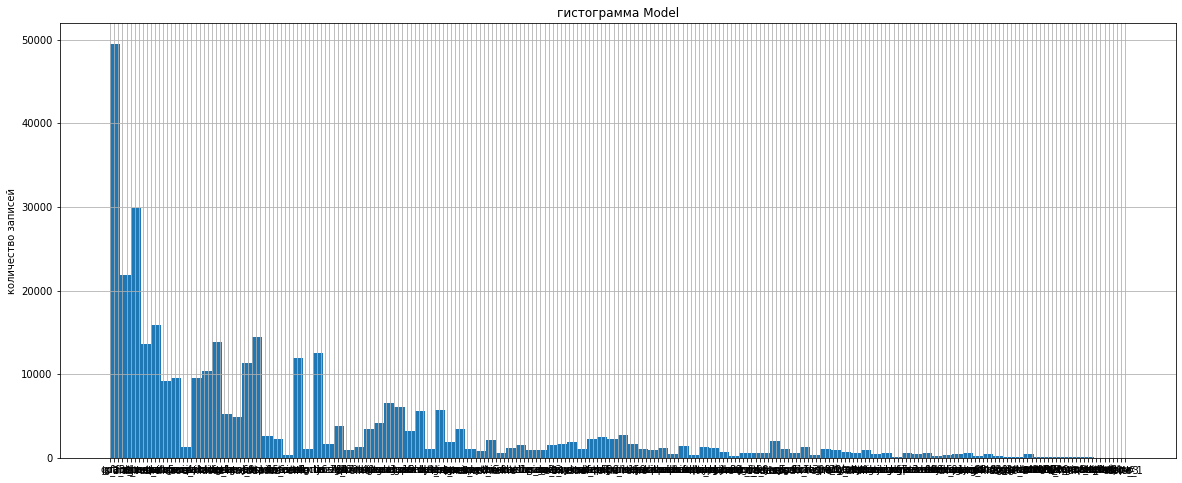

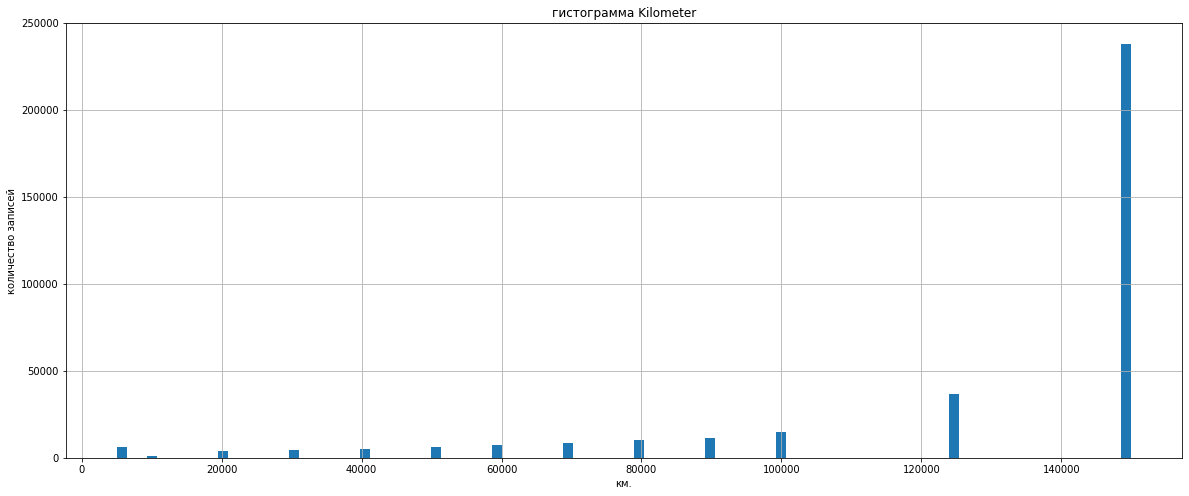

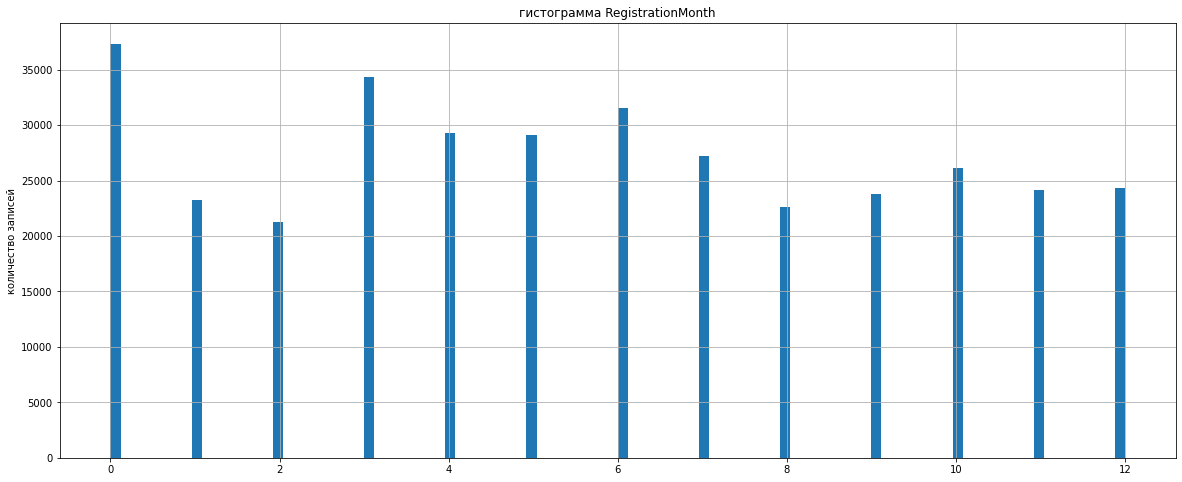

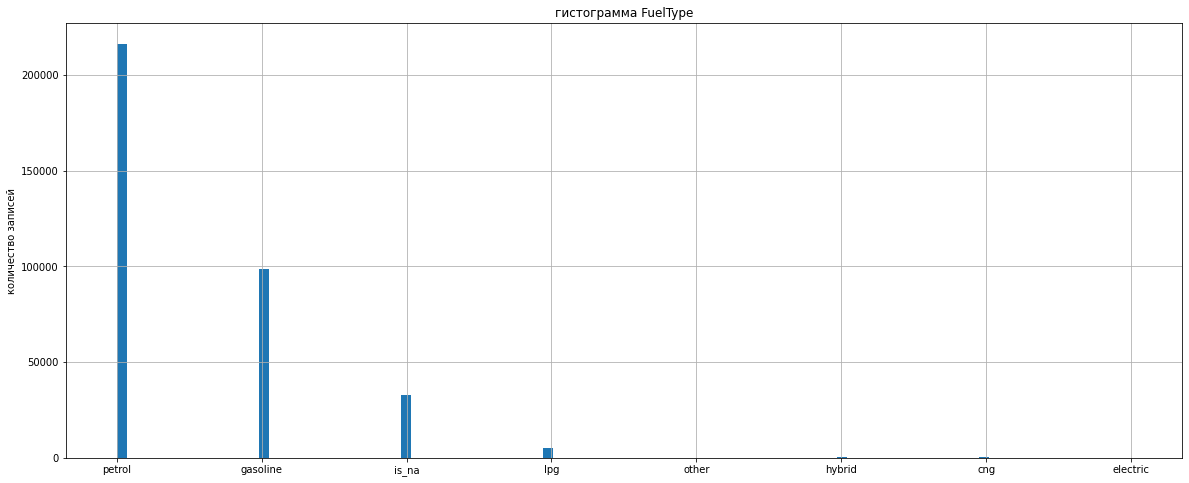

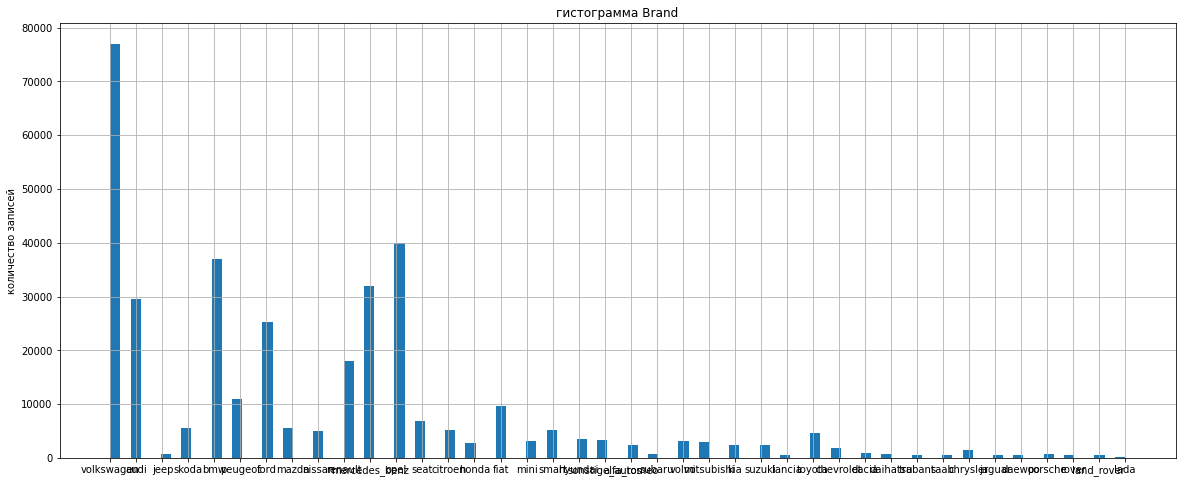

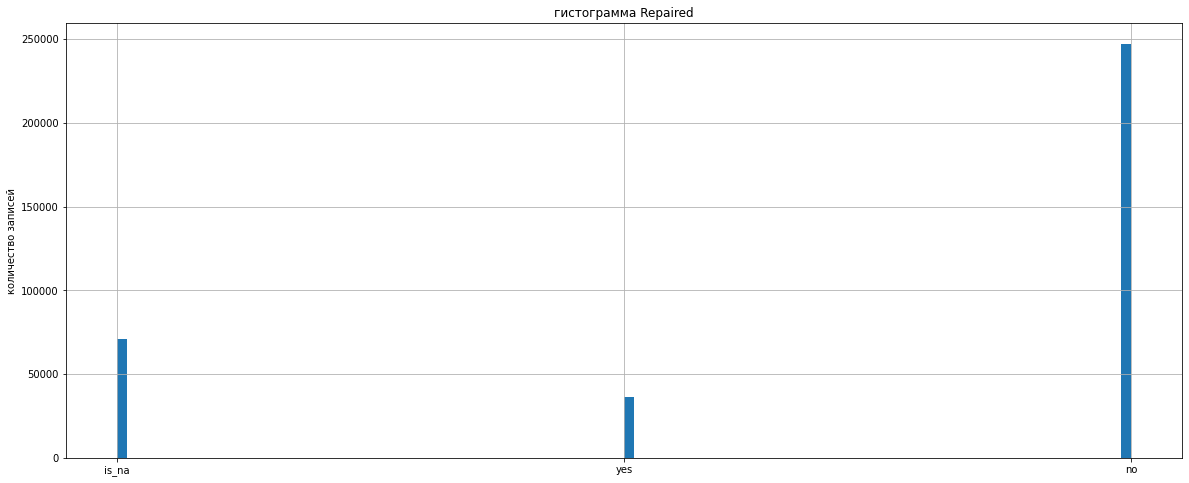

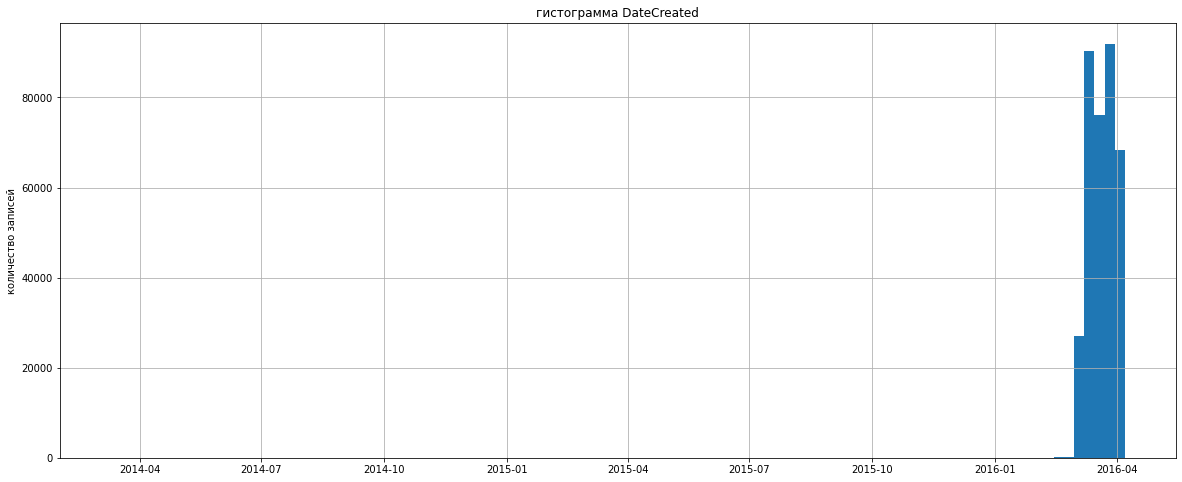

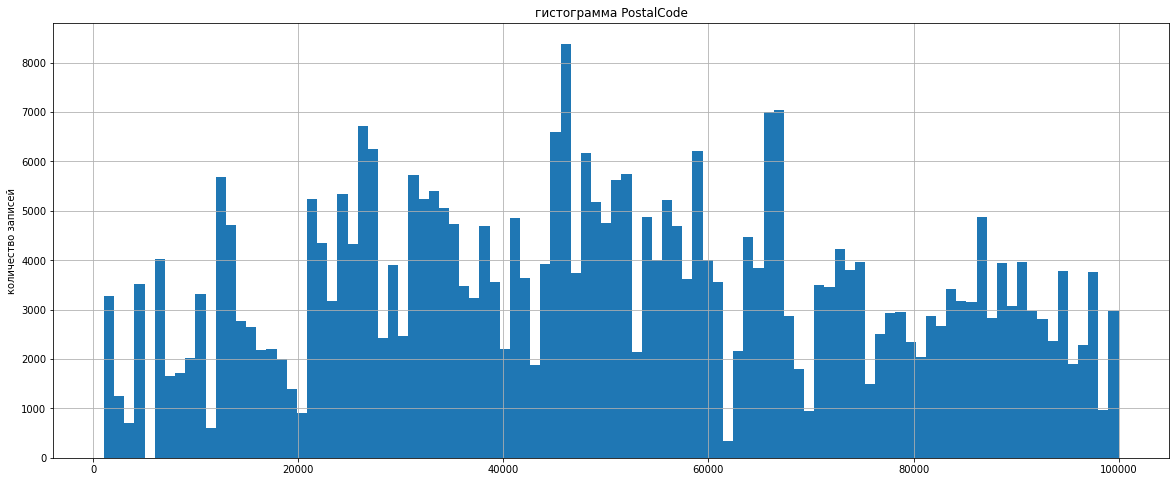

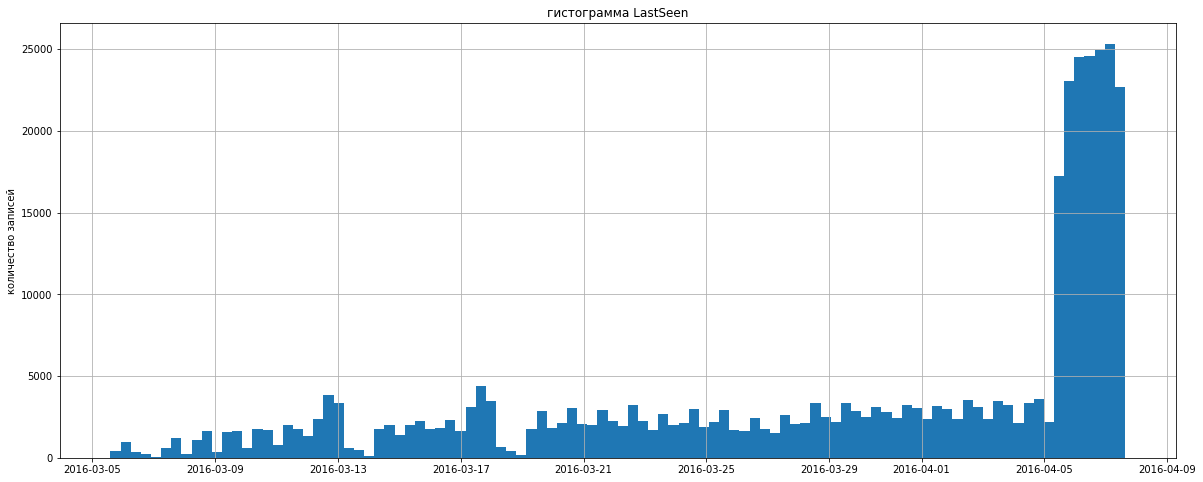

In [12]:
#v2
for i in data.columns:
    ax = data[i].hist(figsize=(20,8), bins = 100, label='гистограмма '+str(i))
    ax.set_ylabel("количество записей")
    plt.title('гистограмма '+str(i))
    if i == 'Price': ax.set_xlabel("евро")
    if i == 'RegistrationYear': ax.set_xlabel("год")
    if i == 'Power': ax.set_xlabel("л.с.")
    if i == 'Kilometer': ax.set_xlabel("км.")
        
    plt.show()

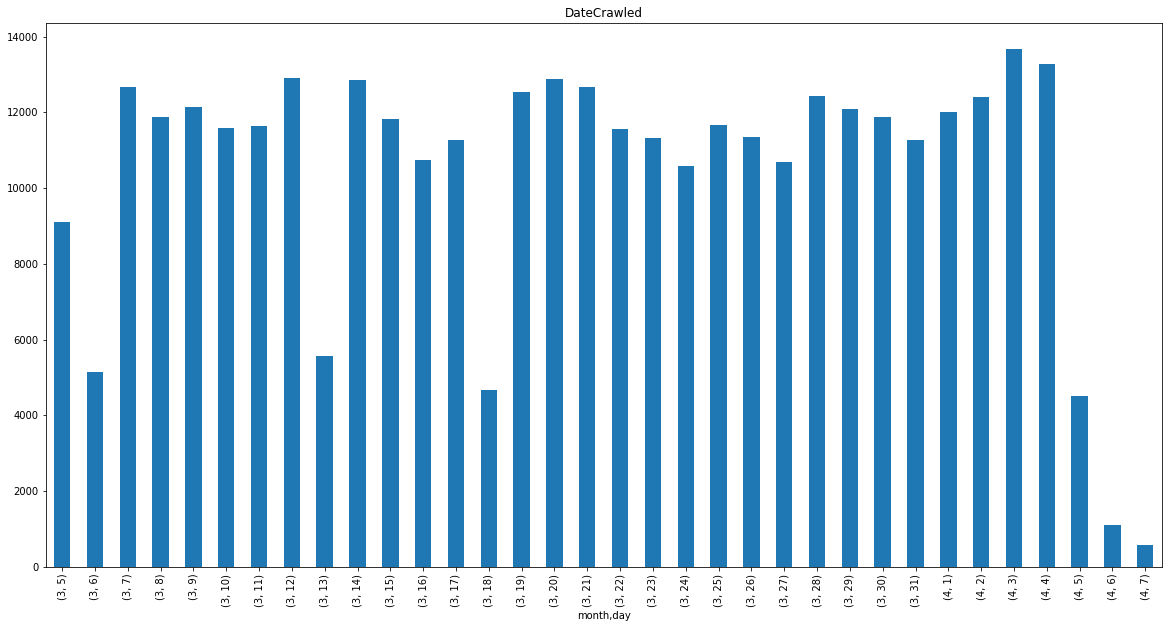

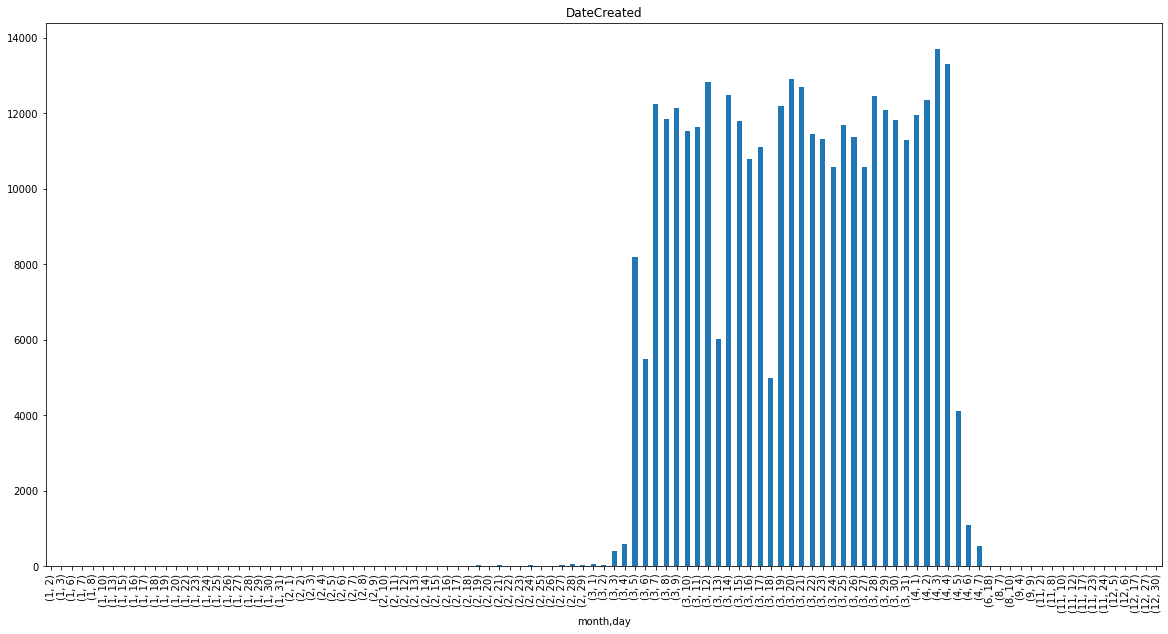

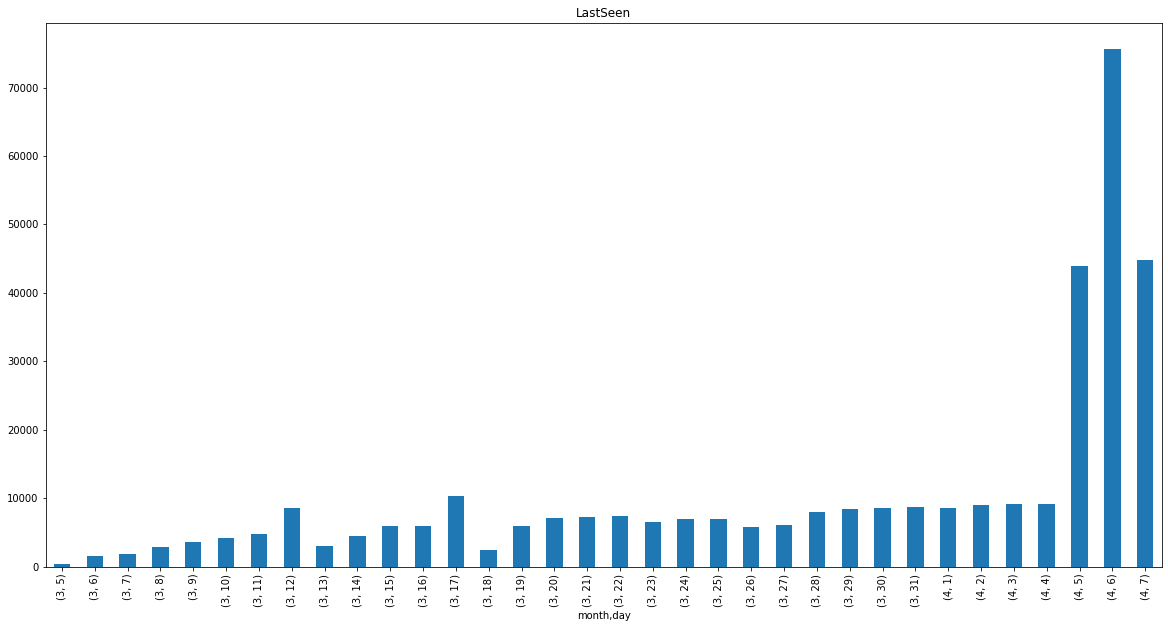

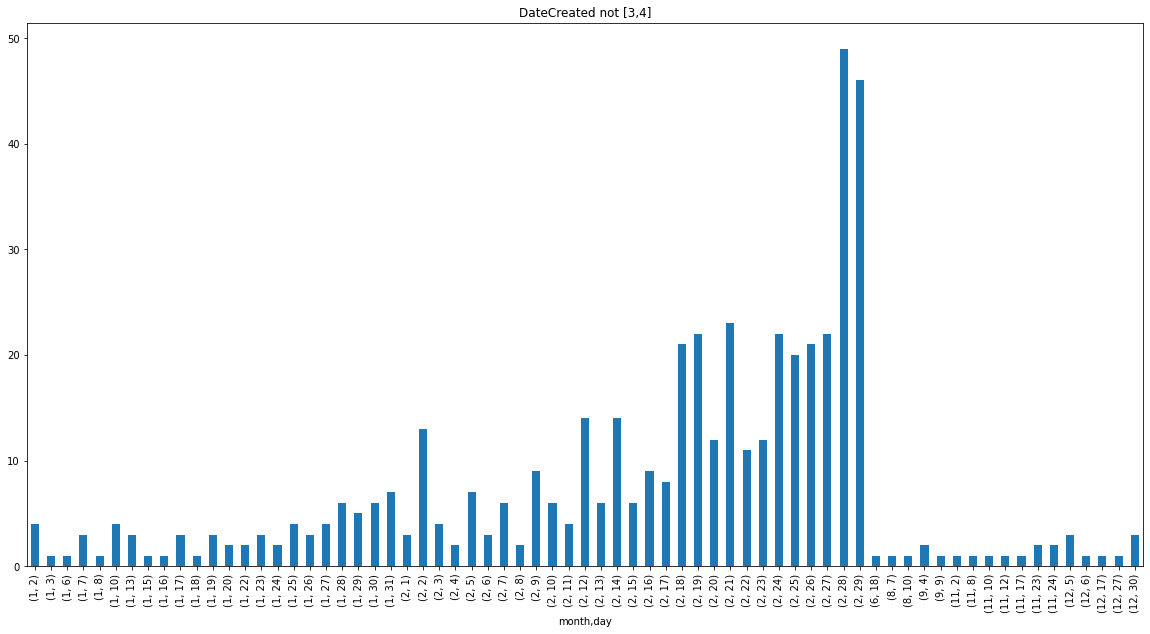

In [13]:
for i in data.columns:
    if type(data[i][0]) == pd._libs.tslibs.timestamps.Timestamp:
        data.groupby([data[i].dt.month, data[i].dt.day]).count()[i].plot(
            kind="bar", title=i,figsize=(20,10), xlabel='month,day')
    plt.show()
data[~(data.DateCreated.dt.month.isin([3,4]))].groupby([data.DateCreated.dt.month, data.DateCreated.dt.day])\
.count().DateCreated.plot(kind="bar", title='DateCreated not [3,4]',figsize=(20,10), xlabel='month,day');
plt.show()

In [14]:
data_tmp=data[['Price', 'DateCrawled', 'DateCreated', 'LastSeen', 'Repaired']].copy()
for i in ['DateCrawled', 'DateCreated', 'LastSeen']:
    tmp=(data_tmp[i].astype(int)//1e9).astype(int)
    data_tmp[i]=tmp-tmp.min()
data_tmp[['Price', 'DateCrawled']]

,Price,DateCrawled
0,480,1633555
1,18300,1630343
2,9800,773159
3,1500,1046862
4,3600,2258338
...,...,...
354360,0,1367076
354361,2200,790925
354362,1199,20999
354363,9200,1227050


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Подскажи, пожалуйста, что тут хотел сделать? Отсутствуют какие-либо поясннения и выводы.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Прошу прощения, тут явно мой косяк: не почистил за собой в CR версии. Если в двух словах, хотел лишний раз убедиться, что даты не связаны с ценой. Штатный метод расчета корелляции не работает с датами, только с целыми значениями. Соответственно перевел в unix время, и сдвинул к минимальной дате. В итоговый блокнот это не должно было попасть.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Принял:)

In [15]:
data[['PostalCode', 'Price', 'Repaired']]

,PostalCode,Price,Repaired
0,70435,480,is_na
1,66954,18300,yes
2,90480,9800,is_na
3,91074,1500,no
4,60437,3600,no
...,...,...,...
354360,2694,0,yes
354361,39576,2200,is_na
354362,26135,1199,no
354363,87439,9200,no


In [16]:
# %%time
# tmp = sns.pairplot(data_tmp, kind='kde', hue='Repaired')
# tmp = sns.pairplot(data[['PostalCode', 'Price', 'Repaired']], kind='kde', hue='Repaired')

Для экономии времени заскриншотил вывод:
![image](https://gifara.ru/ds/3a01/pic1.png)
![image](https://gifara.ru/ds/3a01/pic2.png)

In [17]:
data_tmp.corr().Price

Price          1.000000
DateCrawled    0.014423
DateCreated    0.010376
LastSeen       0.149431
Name: Price, dtype: float64

Предположительно все четыре столбца (дата скачивания анкеты из базы, дата создания анкеты, дата последней активности пользователя) никак не должны сказываться на цене. Удаляем.


In [18]:
for i in ['DateCrawled', 'DateCreated', 'LastSeen', 'PostalCode']:
    try: data=data.drop(i, axis=1)
    except: pass
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
0,480,is_na,1993,manual,0,golf,150000,0,petrol,volkswagen,is_na
1,18300,coupe,2011,manual,190,is_na,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,is_na
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...,...,...
354360,0,is_na,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes
354361,2200,is_na,2005,is_na,0,is_na,20000,1,is_na,sonstige_autos,is_na
354362,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no
354363,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Верно, это лишние признаки.

Удалим выбросы в столбце `RegistrationYear`

In [19]:
tmp = (data[(data.RegistrationYear > 2017) | (data.RegistrationYear < 1960)].RegistrationYear.count()
       / data.RegistrationYear.count() )
display(f'доля выбросов: {tmp:.1%}')
display(data.shape)
data = data[(data.RegistrationYear <= 2017) & (data.RegistrationYear >= 1960)]
display(data.shape)

'доля выбросов: 1.3%'

(354365, 11)

(349854, 11)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
По году регистрации фильтрация корректна.

In [20]:
data.RegistrationMonth.value_counts().sort_index()

0     36216
1     22915
2     21027
3     33976
4     28919
5     28852
6     31182
7     26951
8     22398
9     23595
10    25869
11    23937
12    24017
Name: RegistrationMonth, dtype: int64

13 месяцев... Без возможности определить где некорректные данные... Оставляем как есть.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Давай подумаем, влияет ли как-то месяц __постановки автомобиля на учёт__ на его цену - важно ли будущему автовладельцу, что его автомобиль поставлен на учёт, скажем, в сентябре, а не в июне?

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>

Принято, согласен.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [21]:
#v2
data = data.drop('RegistrationMonth', axis=1)

Посмотрим выбросы в поле `Price`

In [22]:
#tmp = data[data.Price < 2].Price.count()/data.Price.count() #v1
tmp = data[data.Price < 1000].Price.count()/data.Price.count() #v2

display(f'Доля бесплатных машин: {tmp:.1%}')
#data = data[data.Price >= 2] #v1
data = data[data.Price >= 1000] #v2

'Доля бесплатных машин: 23.5%'

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Удалили объявления с низкой ценой.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Я также рекомендую удалить неадекватно низкие значения цен: в пределах цен до 1000 евро вряд ли можно купить полноценный автомобиль.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Аномалии также следует проверить в признаке `Power`.

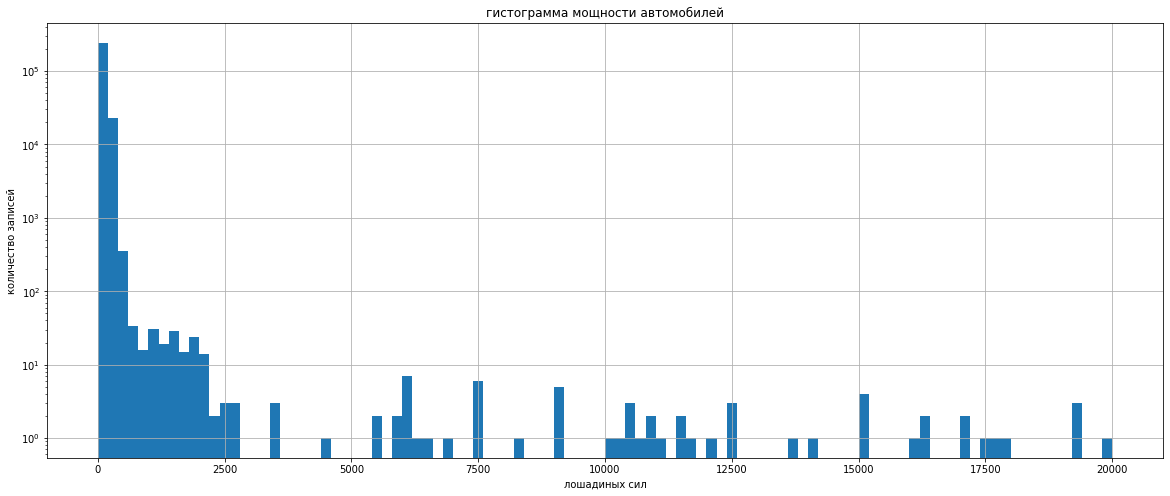

In [23]:
#v2
ax = data.Power.hist(figsize=(20,8), log=True, bins = 100)
ax.set_ylabel("количество записей")
ax.set_xlabel("лошадиных сил")
plt.title('гистограмма мощности автомобилей')
plt.show()

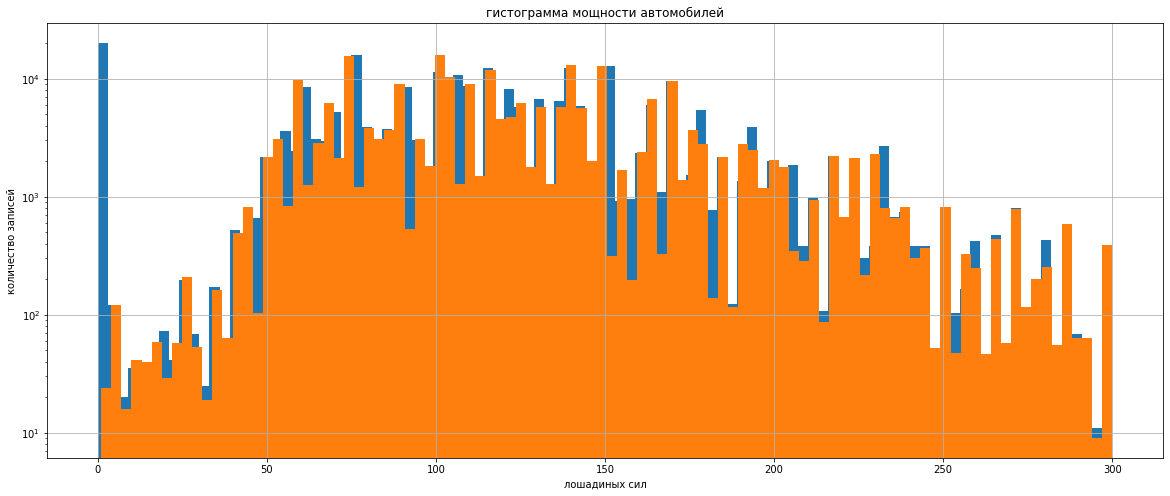

In [24]:
#v3
ax = data.Power.hist(figsize=(20,8), log=True, bins = 100, range=(0, 300))
ax.set_ylabel("количество записей")
ax.set_xlabel("лошадиных сил")
plt.title('гистограмма мощности автомобилей')
data.Power.hist(figsize=(20,8), log=True, bins = 100, range=(1, 300))
plt.show()

In [25]:
#data = data[data.Power < 2500 ] #v2
data = data[(data.Power < 2500) & (data.Power >= 1)] #v3 интернет говорит, что минимальная мощность 0.75 л.с.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

А по нижней границе?

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Ну, сомнительно на самом деле, автомобиль с одной лошадиной силой явно должен вывзвать вопрос по релевантности. Но окей, удалены нули, это главное:)
    
</div>

In [26]:
train, valid = train_test_split(data, test_size=0.20, random_state=RS)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Выполнили сплитование - отлично!

In [27]:
pipe_num = Pipeline(steps=[('scaler', StandardScaler())])
#pipe_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))]) #v1
#pipe_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))]) #v2
#pipe_cat = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='error', sparse=False, drop='first'))]) #v3
pipe_cat = Pipeline(steps=[('encoder', OrdinalEncoder(handle_unknown='use_encoded_value',
    unknown_value=10001))]) #v3

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Трансформеры не нужно оборачивать в `Pipeline` перед подачей в `ColumnTransformer` - можно подавать напрямую.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>

Принято. Но на стадии обучения/правки так легче отслеживать изменения в коде. Как в случае выше.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Не очень понимаю, как связано отслеживание версионности изменений и лишняя обёртка модельного объекта в другой модельный объект. Может, ты не так понял замечание? 
        
Вместо
        
        col_transformer = ColumnTransformer(transformers=[
    ('num_preproc', StandardScaler(), [x for x in data.columns if (data[x].dtype != 'object') &
        (x not in ['Price', 'Kilometer'])]),
    ('cat_periodic', pipe_cat, [x for x in data.columns if (data[x].dtype == 'object') | (x == 'Kilometer')])])
        
можно использовать
        
        col_transformer = ColumnTransformer(transformers=[
    ('num_preproc', pipe_num, [x for x in data.columns if (data[x].dtype != 'object') &
        (x not in ['Price', 'Kilometer'])]),
    ('cat_periodic', OneHotEncoder(handle_unknown='ignore', sparse=False), [x for x in data.columns if (data[x].dtype == 'object') | (x == 'Kilometer')])])
        
Вопрос именно к лишнему использованию `Pipeline`.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>

Конкретно в данном случае это действительно излишне. Но вот пример из одного из предыдущих проектов:
    
```python
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
                    'has_cr_card', 'is_active_member', 'estimated_salary']
categorical_features = ['geography', 'gender']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), ('imputer', KNNImputer())])
categorical_transformer = Pipeline(steps=[('encoder', OrdinalEncoder()), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])
```
В трансформере несколько операций. В принципе можно ,наверное, тоже без дополнительных оберток. Но если шагов будет больше 2, то группировка может помочь читабельности.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Окей, понял, о чём ты. Кажется, субъективная штука, но если тебе так легче воспринимать код - в этом нет проблем или существенных противоречий:)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Для древесных моделей и моделей на бустингах не стоит использовать `OneHotEncoder()` или его аналог `get_dummies()`: эта техника кодирования увеличивает количество признаков, в результате чего модели сложнее создавать разделяющие правила, поэтому время работы и расчётные характеристики моделей сильно страдают на больших наборах данных. Вместо этого нужно использовать `OrdinalEncoder()` - эта техника кодирует категориальные признаки так, что с ними удобнее работать в ходе создания разделяющих правил. 
    
Для бустинговых алгоритмов альетрнатинва - использование внутренних кодировщиков, которые работают лучше сторонних. В случае `CatBoost` за это отвечает параметр `cat_features`. В случае `LightGBM` можно привести эти категориальные признаки к типу `category`, тогда модель будет работать с категориальными признаками автоматически.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Также принято.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Актуально к применению.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Кажется, нам говорили на вебинаре, что OrdinalEncoder() нельзя использовать с линейной регрессией. Поэтому изначально и выбирал OneHotEncoder() как более универсальный вариант.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Всё верно, выше я обращаю внимание, что это лучше только для деревьев и бустингов:)
        
<div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> `OneHotEncoder` полезно настраивать на бесперебойную работу при появлении в новых данных ранее неизвестных значений признаков: по умолчанию в таких случаях `OneHotEncoder` будет выбрасывать ошибку, однако для непрерывности процесса моделирования можно настроить параметр `handle_unknown='ignore'`, чтобы новые, ранее неизвестные значения игнорировались и не включались в итоговую матрицу.
        
То же касается `OrdinalEncoder`: по умолчанию в таких случаях `OrdinalEncoder` будет выбрасывать ошибку, однако для непрерывности процесса моделирования можно настроить параметры `handle_unknown='use_encoded_value'`, чтобы новые, ранее неизвестные значения кодировались константным значением, а в параметр `unknown_value` нужно передать само значение-константу. 

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Поправил.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
У `OneHotEncoder` обязательно нужно настраивать параметр `drop='first'` (или другой, в зависимости от задачи) при использовании линейных моделей, чтобы в трансформированной матрице не было мультиколлинеарности и чтобы не попасть в дамми-ловушку: https://www.codecamp.ru/blog/dummy-variable-trap/.
    
Может понадобиться обновление библиотеки `sklearn`, так как в ранних версиях параметры `handle_unknown` и `drop` конфликтовали друг с другом, но в актуальной версии библиотеки такой проблемы нет.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Поправил. Библиотеку обновил. Конфликт существует. Откатил обратно.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Оба параметра являются важными для `OneHotEncoder`, так как гарнатируют отсутствие ошибок при преобразовании данных. Конфликт решается обновлением библиотеки и последующим перезапуском ядра, чтобы изменения подтянулись в окружение.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Но по факту не работает. Снимаю комментарии с нужной строки. Обновление библиотеки делаю в In1: `!pip install -U sklearn`. Перезапускаю ядро дважды. Запускаю "Run all". Получаю ошибку:
![](https://gifara.ru/ds/3a01/err1.png) 
Если изменить `handle_unknown` на `error`, то получаю другую ошибку:
![](https://gifara.ru/ds/3a01/err2.png)
Переустановить библиотеку из коммандной строки не представляется возможным, т.к. это сервер яндекса, к которому доступа нет. В итоге выглядит как шах и мат.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Я не смог воспроизвести этот баг на плафторме: попробовал ниже - у меня всё работает.
    
<div>

In [2]:
!pip install -U scikit-learn

     |████████████████████████████████| 10.9 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 95.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(drop='first', handle_unknown='ignore')

OneHotEncoder(drop='first', handle_unknown='ignore')

In [28]:
#v2
col_transformer = ColumnTransformer(transformers=[
    ('num_preproc', pipe_num, [x for x in data.columns if (data[x].dtype != 'object') &
        (x not in ['Price', 'Kilometer'])]),
    ('cat_periodic', pipe_cat, [x for x in data.columns if (data[x].dtype == 'object') | (x == 'Kilometer')])])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект - так твоё решение будет более гибким и масштабируемым. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
`kilometer` имеет распределение категориального признака, так как задано всего несколько уникальных значений - с ним также стоит работать как с категорией.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.

## Обучение моделей

<div class=style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px; background: #ddd">

* Для оценки качества моделей применяйте метрику RMSE.
* Значение метрики RMSE должно быть меньше 2500.
* Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
* Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
</div>

Действия однотипны, подготовим инструменты:

In [29]:
# result = pd.DataFrame(columns=['label', 'best_param', 'time_fit', 'time_predict', 'rmse_train',
# #                               'rmse_valid', 'best_model']) #v1
#                                'rmse_valid', 'best_model', 'rmse_cv', 'cv_model']) #v2
result = pd.DataFrame(columns=['label', 'best_param', 'time_fit', 'time_predict', 'rmse', 'best_model']) #v3
RMSE=lambda x,y: MSE(x, y, squared=False)
score_RMSE = make_scorer(RMSE, greater_is_better=False)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть пользовательский скорринг для кросс-валидации - отлично!
    
Тут можно сделать чуть проще:
- метрика `mean_squared_error` имеет параметр `squared`, и если настроить `squared=False`, то на выходе сразу будет `RMSE` вместо `MSE` - не нужно будет извлекать корень вручную;
- в целом `make_scorer` не нужен, потому что метрика `RMSE` входит в базовый пакет метрик `sklearn`, поэтому в `scoring` можно передать строковое обозначение `RMSE`, которое выглядит как `neg_root_mean_squared_error`.

In [30]:
#v2
# def get_metrics(*, param_grid, model, label, train, to_predict):
#     pipeline_current = Pipeline(steps = [('preprocessor', col_transformer), ('regressor', model() )])
#     model_current = GridSearchCV(pipeline_current, verbose=VERBOSE, param_grid=param_grid, cv=CV,
#         refit=True, error_score = 'raise', scoring=score_RMSE)    
#     model_current.fit(train.drop('Price', axis=1), train.Price)
#     rmse_cv = - model_current.best_score_ #v2
#     cv_model = model_current.best_estimator_ #v2
#     exist_hyper=[]
#     for i in list(model_current.get_params().keys()):
#         if 'estimator__regressor__' in i: exist_hyper.append(i.replace('estimator__regressor__', ''))
#     display(f"доступные гиперпараметры: {exist_hyper}")
#     tmp = model_current.best_params_
#     best_param = {}
#     for i in tmp:
#         if type(tmp[i]) == int:
#             j = i.replace('regressor__', '')
#             best_param[j] = tmp[i]
#     print(f'Лучшие гиперпараметры: {best_param}')
#     start=time.time()
#     pipeline_current = Pipeline(steps = [('preprocessor', col_transformer), ('regressor', model(**best_param) )])
#     model_current = pipeline_current.fit(train.drop('Price', axis=1), train.Price)
#     time_fit = time.time() - start
#     time_predict = time.time() - start - time_fit
#     return pd.Series({'label':label, 'best_param': best_param, 'time_fit': time_fit,
#         'time_predict': time_predict,
#         'rmse_train': RMSE(model_current.predict(train.drop('Price', axis=1)), train.Price),
#         'rmse_valid': RMSE(model_current.predict(to_predict.drop('Price', axis=1)), to_predict.Price),
# #        'best_model': model_current}) #v1
#         'best_model': model_current, 'rmse_cv': rmse_cv, 'cv_model': cv_model}) #v2

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
![](https://gifara.ru/ds/3a01/pic4.png)
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Всё верно, у константной модели параметра нет.
    
<div>

In [31]:
#v3
def get_metrics(*, param_grid, model, label, train, to_predict):
    # добавляем позорные костыли, чтобы удовлетворить хотелку с переносом random_state в параметры модели
    if model != DummyRegressor:
        pipeline_current = Pipeline(steps = [('preprocessor', col_transformer),
                                         ('regressor', model(random_state=RS) )])
    else:
        pipeline_current = Pipeline(steps = [('preprocessor', col_transformer),
                                         ('regressor', model() )])
    model_current = GridSearchCV(pipeline_current, verbose=VERBOSE, param_grid=param_grid, cv=CV,
        refit=True, error_score = 'raise', scoring=score_RMSE)    
    model_current.fit(train.drop('Price', axis=1), train.Price)
    time_fit = model_current.refit_time_
    exist_hyper=[]
    for i in list(model_current.get_params().keys()):
        if 'estimator__regressor__' in i: exist_hyper.append(i.replace('estimator__regressor__', ''))
    display(f"доступные гиперпараметры: {exist_hyper}")
    display(f'Лучшие гиперпараметры: {model_current.best_params_}')
    start=time.time()
    tmp = model_current.best_estimator_.predict(train.drop('Price', axis=1))
    time_predict = time.time() - start
    return pd.Series({'label':label, 'best_param': model_current.best_params_, 'time_fit': time_fit,
        'time_predict': time_predict,
        'rmse': - model_current.best_score_,
        'best_model': model_current.best_estimator_})

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Классное решение для поиска лучшей модели и оценки её метрик.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Вместо повторного создания `Pileline` с моделью на лучших гиперпараметрах можно использовать `best_estimator_`.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
У меня не хватает знаний, можно ли дообучать модель. Тем более произвольную. GridSearchCV возвращает модель обученную без одного фолда (который использовался для валидации лучшей модели).
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

Нет, тут не совсем верно - см.документацию:
        
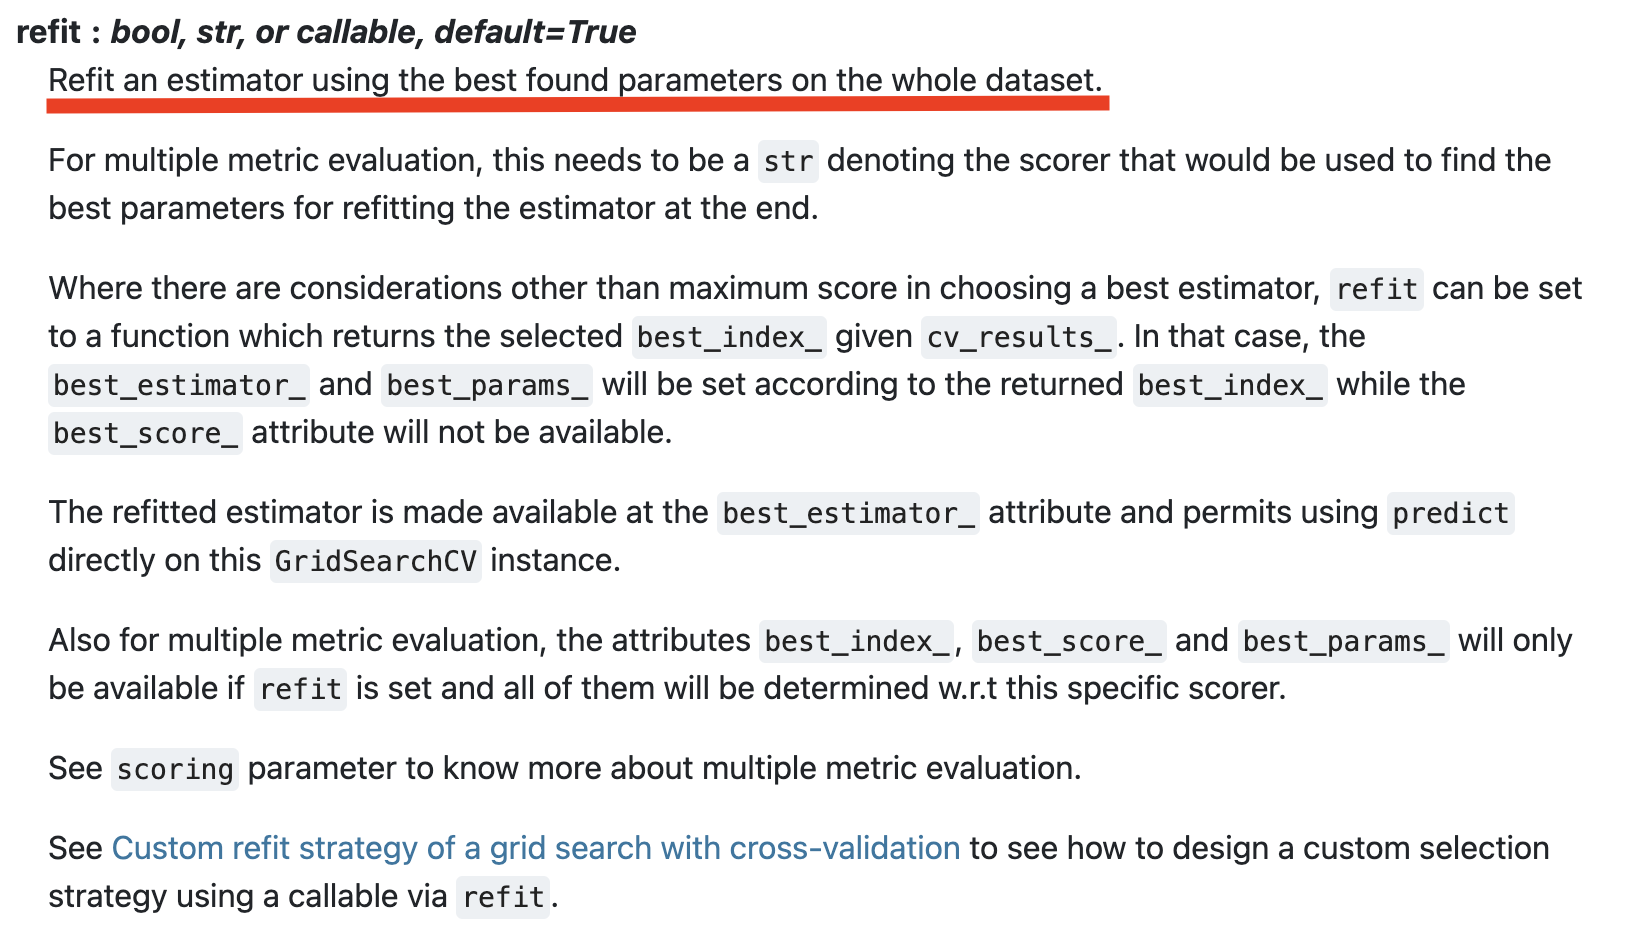
        
По умолчанию `GridSearchCV` возвращает в `best_estimator_` уже обученную на всё датасете лучшую модель.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Не верно. Я на прошлом проекте как раз на этом обжегся и потерял несколько дней. Лучшая модель возвращаемая по умолчанию из GridSearchCV, и модель обученная с такими же параметрами вручную давали разные вектора предсказаний. Вероятно есть флаг, но по умолчанию это не работало.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Не сталкивался, потом посмотрю сам ради интереса. 
    
<div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

1. Решение с циклом очень трудоёмкое и избыточно сложное - есть атрибут `best_params_`, откуда можно получить лучшие гиперпараметры модели. 
    
2. Вместо оценки `RMSE` на `train` и `test` (`valid` выполняет функцию `test`) нужна оценка на кросс-валидации из `best_score_`.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
1. В CR версии я использовал чистые параметры из `best_params_` и модель, которую предоставляет GridSearchCV. Но при этом теряется 1 фолд из набора обучающей выборки. Именно чтобы обучить модель на всей обучающей выборке повторно и создается повторный Pipeline. Но туда нужно передать гиперпараметры из best_params_. И их название иное. Вот для трансформации **названия** (тип строка) гиперпараметра и используется тут цикл for, который проходит по значениям из `best_params_`. Первый же for просто выводит список доступных гиперпараметров для данной модели, без их вычисления. (Просто для удобства, чтобы не гуглить какие гиперпараметры существуют у конкретной модели)
    
2. Так можно сделать, согласен, но тогда это будет оценка не всего train, а без одного фолда, пусть и лучшая. Не лучше ли взять лучшие гиперпараметры, и обучить модель с ними на всей обучающей выборке? Очевидно же, что это улучшит качество модели!
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

1. См.выше - ничего не теряется.
    
2. При кросс-валидации модель обучается на всём наборе данных, так как оценивающий фолд меняется, а результаты кросс-валидации усредняются - в результате мы имеем среднюю оценку модели, которая обучилась на всех тренировочных данных, просто сам процесс организован без подглядывания. Оценка на `train` в этом случае менее валидна, так как получена на данных, которые модель видела во время обучения - она, в отличие от кросс-валидации, где оценивающий фолд всегда не участвует в обучении, будет всегда более оптимистичной. А оценка на `test` (твоя `valid`) на данном этапе вообще не нужна, на `test` мы оцениваем только лучшую модель, выбранную по итогу сравнительной характеристики.
3. Обрати также внимание, что фактически время предсказания не замеряется - предсказания ты делаешь уже непосредственно в блоке `return`, а время предсказания вставляешь фиктивное. Нужно явно замерить время операции.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.
    
<div>

Используем модель леса:

In [32]:
result.loc[len(result)] = get_metrics(model=DecisionTreeRegressor,
            param_grid={#'regressor__random_state': [RS], #v1
                'regressor__max_depth': list(range(13,15)), # проверен в v1 list(range(7,15))
                'regressor__min_samples_leaf': list(range(9, 11))}, # проверен в v1 list(range(8, 15))
            label='tree', train=train, to_predict=valid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END regressor__max_depth=13, regressor__min_samples_leaf=9; total time=   0.7s
[CV 2/3] END regressor__max_depth=13, regressor__min_samples_leaf=9; total time=   0.7s
[CV 3/3] END regressor__max_depth=13, regressor__min_samples_leaf=9; total time=   0.7s
[CV 1/3] END regressor__max_depth=13, regressor__min_samples_leaf=10; total time=   0.7s
[CV 2/3] END regressor__max_depth=13, regressor__min_samples_leaf=10; total time=   0.7s
[CV 3/3] END regressor__max_depth=13, regressor__min_samples_leaf=10; total time=   0.7s
[CV 1/3] END regressor__max_depth=14, regressor__min_samples_leaf=9; total time=   0.7s
[CV 2/3] END regressor__max_depth=14, regressor__min_samples_leaf=9; total time=   0.7s
[CV 3/3] END regressor__max_depth=14, regressor__min_samples_leaf=9; total time=   0.7s
[CV 1/3] END regressor__max_depth=14, regressor__min_samples_leaf=10; total time=   0.7s
[CV 2/3] END regressor__max_depth=14, regressor__min_sam

"доступные гиперпараметры: ['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']"

"Лучшие гиперпараметры: {'regressor__max_depth': 14, 'regressor__min_samples_leaf': 9}"

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

    
`random_state` нужно убрать из сетки гиперпараметров и настраивать его в момент инициализации модели: так как это чисто технический гиперпараметр, отвечающий за начальные характеристики модели, то в его оптимизации нет смысла - он не влияет на качество работы модели.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
Если он один, то он и не оптимизируется. Это даже по логам verbose видно. Но зато в `best_params_` при этом сохраняются все данные, позволяющие однозначно воспроизвести результат не просматривая весь блокнот.
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>

    
Я понимаю. Гиперпараметры, которые не перебираются в сетке, нужно сразу в модели настраивать, а передавать через сетку. Тем более - технические. Твой подход методологически неправильный - это как топором колбасу нарезать: можно, но зачем?:)

Используем модель градиентного бустинга:

In [33]:
result.loc[len(result)] = get_metrics(model=LGBMRegressor,
            param_grid={#'regressor__random_state': [RS], #v1
                'regressor__max_depth': list(range(13,15)), # проверен в v1 list(range(7,15))
                'regressor__num_leaves': [31, 50]}, # проверен в v1 [28, 31, 50]
            label='LGBMRegressor', train=train, to_predict=valid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END regressor__max_depth=13, regressor__num_leaves=31; total time=   4.2s
[CV 2/3] END regressor__max_depth=13, regressor__num_leaves=31; total time=   4.2s
[CV 3/3] END regressor__max_depth=13, regressor__num_leaves=31; total time=   7.4s
[CV 1/3] END regressor__max_depth=13, regressor__num_leaves=50; total time=   6.9s
[CV 2/3] END regressor__max_depth=13, regressor__num_leaves=50; total time=   5.3s
[CV 3/3] END regressor__max_depth=13, regressor__num_leaves=50; total time=   4.8s
[CV 1/3] END regressor__max_depth=14, regressor__num_leaves=31; total time=   4.5s
[CV 2/3] END regressor__max_depth=14, regressor__num_leaves=31; total time=   5.2s
[CV 3/3] END regressor__max_depth=14, regressor__num_leaves=31; total time=   4.9s
[CV 1/3] END regressor__max_depth=14, regressor__num_leaves=50; total time=   5.2s
[CV 2/3] END regressor__max_depth=14, regressor__num_leaves=50; total time=   5.2s
[CV 3/3] END regressor__max

"доступные гиперпараметры: ['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq']"

"Лучшие гиперпараметры: {'regressor__max_depth': 13, 'regressor__num_leaves': 50}"

In [34]:
#v2
result.loc[len(result)] = get_metrics(model=DummyRegressor,
            param_grid={},
            label='DummyRegressor', train=train, to_predict=valid)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ................................................ total time=   0.4s
[CV 2/3] END ................................................ total time=   0.4s
[CV 3/3] END ................................................ total time=   0.4s


"доступные гиперпараметры: ['constant', 'quantile', 'strategy']"

'Лучшие гиперпараметры: {}'

In [35]:
#result[['label', 'rmse_train', 'time_fit', 'time_predict']] #v1
#result[['label', 'rmse_train', 'rmse_cv', 'time_fit', 'time_predict']] #v2
result.sort_values('rmse') #v3

,label,best_param,time_fit,time_predict,rmse,best_model
1,LGBMRegressor,"{'regressor__max_depth': 13, 'regressor__num_l...",13.083940,2.197518,1742.032343,(ColumnTransformer(transformers=[('num_preproc...
0,tree,"{'regressor__max_depth': 14, 'regressor__min_s...",0.875814,0.339875,1930.886957,(ColumnTransformer(transformers=[('num_preproc...
2,DummyRegressor,{},0.401741,0.297964,4575.749216,(ColumnTransformer(transformers=[('num_preproc...


## Анализ моделей

~~По всем трем интересующим метрикам лучшей оказалась модель `LGBMRegressor`. Однако первые 7 итераций подбора гиперпараметров происходили на порядок медленнее.~~

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v3: <a class="tocSkip"></a> </h2>
    
Для веба LGBMRegressor тяжеловат, но дает более точные предсказания. На стоечном сервере его можно использовать, для "пользовательского" оборудования лучше использовать модель дерева. Она в данном случае выбирается лучшей.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Окей:)
    
<div>

In [38]:
%%time
predict_valid = result[result.label == 'tree'].iloc[0].best_model.predict(valid.drop('Price', axis=1))
RMSE(predict_valid, valid.Price)

CPU times: user 103 ms, sys: 0 ns, total: 103 ms
Wall time: 101 ms


1907.9227500676154

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Анализ моделей должен быть выполнен по метрикам `RMSE` на кросс-валидации, времени обучения/предсказани лучшего экщемпляра модели на `train`. 
    
По итогу выбирается __одна__ лучшая модель, которая оценивается на `test`.
    
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px">
<h2> Комментарий студента v2: <a class="tocSkip"></a> </h2>
    
п.1: добавил в код вычисление RMSE на кросс-валидации (и сохранение модели). Еще раз уточню: заказчик реально хочет менее качественную модель, у которой объем данных для обучения на 33% меньше?  Код переписать можно, но со стороны это выглядит глупостью. Даже из таблицы видно, что добавление этого фолда улучшает метрику у обоих актуальных моделей.
    
п.2: Я понимаю, что оценка на test не должна влиять на выбор лучшей модели. Именно поэтому при выводе параметров я явным образом и ограничил столбцы, которые выводятся в таблице. Но какая разница, на каком этапе я вычисляю оценку для test, если я не пользуюсь результатом вплодь до выбора лучшей модели, и только после выбора вывожу результат? Это же сильно упрощает код и делает его универсальным.
    
п.3: добавил.
    
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

1. По фолдам ответил выше - сейчас твой модельный процесс организован некорректно из-за неверного представления о процессе работы `GridSerachCV` и кросс-валидации в целом.
    
2. Разница есть - работу нужно выполнять методологически корректно и последовательно. `test` выборка должна появляться только при оценке лучшей модели, до тех пор она нам недоступна. На `test` оцениваем только одну модель, лучшую по итогам кросс-валидации. Эта концепция находит своё отражение в условиях эксплуатации модели в реальной среде: в промышленной эксплуатации не работает несколько моделей одновременно - в промышленную эксплуатацию запускают только одну модель, которая была выбрана из нескольких в ходе промежуточной оценки. Так же и здесь - тестовая выборка имитирует поток реальных данных, и с этим потоком должна работать только одна модель. Я понимаю, что тебе, возможно, не хочется вносить глобальные правки в структуру своей функции, но не нужно делать оценку всего подряд просто потому, что мы можем это сделать - нужно соблюдать методологически верную последовательность действий.
    
3. Оценивать не нужно ни на `train`, ни на кросс-валидации - только на `test`.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.
    
<div>

## Выводы
* На стадии подготовки данных:
    * Были выявлены и удалены явные дубликаты
    * Пропуски были заполнены заглушкой
    * Были удалены столбцы, не влияющие на цену автомобиля
    * Были удалены выбросы в столбцах `RegistrationYear` и `Price`
* На стадии обучения моделей:
    * Были использованы модели `DecisionTreeRegressor` и `LGBMRegressor`
    * Для моделей производился выбор лучших гиперпараметров
    * На основе выбранных гиперпараметров были обучены модели, и сняты необходимые метрики
* На стадии анализа моделей:
    * Порог RMSE был успешно преоболен обоими моделями.
    * ~~По всем 3 интересующим метрикам модель `LGBMRegressor` оказалась лучше.~~
    * Лучшей была признана модель дерева, которая быстро работает и дает предсказания с приемлемой погрешностью.


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть итоговый вывод - отлично!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

В части замечаний нужно скорректировать.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Пока актуально.

<div class="alert alert-success">
<h2> Комментарий ревьюера v.3 <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Учтено.
    
<div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Александр, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.
    
Отмечу отличную предобработку данных - были найдены и корректно обработаны все аномалии и пропуски, также выполнено кодирование категориальных переменных.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `GridSearchCV`. Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый объект - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Александр, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.2`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Александр, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)